In [32]:
library(tidyverse)

library(patchwork)
library(ggplot2)

source("../../utils/plots_eda.R")

# Results processing

In [3]:
# Define the path and list all zip files
path_to_fed <- "after/kmeans_res/before"
zip_files <- list.files(path = path_to_fed, pattern = "\\.zip$", full.names = TRUE)

# Required file paths inside the zip archives
required_files <- c("kmeans/K_2/clustering.csv", "kmeans/K_6/clustering.csv",
                    "design.tsv")

for(i in seq_along(zip_files)) {
  zipfile <- zip_files[i]
  zip_contents <- unzip(zipfile, list = TRUE)$Name
  
  # Process each required file within the zip archive
  for (req in required_files) {
    if (!req %in% zip_contents) {
      warning(sprintf("File '%s' not found in zip: %s", req, zipfile))
      next
    }
    
    # Extract the specific file to the destination folder
    unzip(zipfile, files = req, exdir = path_to_fed)
    
    # Determine the destination filename based on the required file
    # Extract the specific part ("2" or "5") from the path using a simple regex:
    match <- regexpr("K_([0-9]+)", req)
    extracted_num <- if(match[1] != -1) substring(req, match[1] + 2, match[1] + attr(match, "match.length") - 1) else "unknown"
    new_csv_name <- file.path(path_to_fed, sprintf("%d_%s_clustering.csv", i, extracted_num))
    
    # Determine the path to the extracted file (it might be in a subdirectory)
    extracted_csv_path <- file.path(path_to_fed, req)
    if (!file.exists(extracted_csv_path)) {
      # Search recursively if not found in the expected location
      extracted_files <- list.files(path_to_fed, pattern = "\\.csv$", full.names = TRUE, recursive = TRUE)
      candidate <- extracted_files[basename(extracted_files) == basename(req)]
      if(length(candidate) > 0) {
        extracted_csv_path <- candidate[1]
      } else {
        warning(sprintf("Extracted CSV file not found for '%s' in zip: %s", req, zipfile))
        next
      }
    }
    
    # Rename (or move) the extracted file to the new filename
    if(!file.rename(from = extracted_csv_path, to = new_csv_name)) {
      warning(sprintf("Failed to rename file: %s to %s", extracted_csv_path, new_csv_name))
    }
  }
}


In [32]:
# Define the path and list all zip files
path_to_fed <- "after/kmeans_res/after"
zip_files <- list.files(path = path_to_fed, pattern = "\\.zip$", full.names = TRUE)

# Required file paths inside the zip archives
required_files <- c("kmeans/K_2/clustering.csv", "kmeans/K_6/clustering.csv",
                    "design.tsv")

for(i in seq_along(zip_files)) {
  zipfile <- zip_files[i]
  zip_contents <- unzip(zipfile, list = TRUE)$Name
  
  # Process each required file within the zip archive
  for (req in required_files) {
    if (!req %in% zip_contents) {
      warning(sprintf("File '%s' not found in zip: %s", req, zipfile))
      next
    }
    
    # Extract the specific file to the destination folder
    unzip(zipfile, files = req, exdir = path_to_fed)
    
    # Determine the destination filename based on the required file
    # Extract the specific part ("2" or "5") from the path using a simple regex:
    match <- regexpr("K_([0-9]+)", req)
    extracted_num <- if(match[1] != -1) substring(req, match[1] + 2, match[1] + attr(match, "match.length") - 1) else "unknown"
    new_csv_name <- file.path(path_to_fed, sprintf("%d_%s_clustering.csv", i, extracted_num))
    
    # Determine the path to the extracted file (it might be in a subdirectory)
    extracted_csv_path <- file.path(path_to_fed, req)
    if (!file.exists(extracted_csv_path)) {
      # Search recursively if not found in the expected location
      extracted_files <- list.files(path_to_fed, pattern = "\\.csv$", full.names = TRUE, recursive = TRUE)
      candidate <- extracted_files[basename(extracted_files) == basename(req)]
      if(length(candidate) > 0) {
        extracted_csv_path <- candidate[1]
      } else {
        warning(sprintf("Extracted CSV file not found for '%s' in zip: %s", req, zipfile))
        next
      }
    }
    
    # Rename (or move) the extracted file to the new filename
    if(!file.rename(from = extracted_csv_path, to = new_csv_name)) {
      warning(sprintf("Failed to rename file: %s to %s", extracted_csv_path, new_csv_name))
    }
  }
}


# Read clustering results

In [33]:
design_all <- NULL
paths_to_fed <- c("after/kmeans_res/before", "after/kmeans_res/after")

for(path_to_fed in paths_to_fed){
    design_result <- NULL
    for(i in 1:6){
        design <- read_delim(
            paste0(path_to_fed, "/", i, "_unknown_clustering.csv"), 
            col_names = TRUE,
            delim = "\t",
            # supress warnings
            show_col_types = FALSE
        )
        # Read the clustering results
        clustering_results <- read_delim(
            paste0(path_to_fed, "/", i, "_2_clustering.csv"), 
            col_names = TRUE,
            delim = ";",
            # supress warnings
            show_col_types = FALSE
        )
        # if before in the name, add _before
        if (grepl("before", path_to_fed)) {
            design$K2_before <- clustering_results$`0`
        } else {
            design$K2_after <- clustering_results$`0`
        }
        
        # Read the clustering results
        clustering_results <- read_delim(
            paste0(path_to_fed, "/", i, "_6_clustering.csv"), 
            col_names = TRUE,
            delim = ";",
            # supress warnings
            show_col_types = FALSE
        )
        if (grepl("before", path_to_fed)) {
            design$K6_before <- clustering_results$`0`
        } else {
            design$K6_after <- clustering_results$`0`
        }

        if (is.null(design_result)) {
            design_result <- design
        } else {
            design_result <- rbind(design_result, design)
        }
    }
    if (is.null(design_all)) {
        design_all <- design_result
    } else {
        # join the two dataframes using sample_id	Status	batch columns
        design_all <- full_join(design_all, design_result, by = c("sample_id", "Status", "batch"))
    }
}



New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [34]:
# write design_all to file
write_delim(
    design_all,
    "after/design_all.tsv",
    delim = "\t",
    col_names = TRUE
)

# New columns added

In [20]:
design_all <- read_delim(
    "after/design_all_updated.tsv",
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
)
colnames(design_all)

[1] "sample_id"         "Status"            "batch"            
[4] "K2_before"         "K6_before"         "K2_after"         
[7] "K6_after"          "Central_2K_before" "Central_2K_after"

In [21]:
design_all <- design_all %>%
    mutate(
        # all columns to factor
        sample_id = as.factor(sample_id),
        # 0 is Glu, 1 is Pyr
        Status = factor(Status, levels = c(0, 1), labels = c("Contol", "Tumor")),
        batch = as.factor(batch),
        K2_before = factor(K2_before),
        K6_before = as.factor(K6_before),
        K2_after = as.factor(K2_after),
        K6_after = as.factor(K6_after),
        Central_2K_before = factor(Central_2K_before),
        Central_2K_after = factor(Central_2K_after)
    )


# plots based on the results

In [22]:
expr_before <- read_delim(
    "before/all_expr_for_correction.tsv", 
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
) %>%  column_to_rownames("gene_id")
# expr_before <- t(expr_before) %>% as.data.frame()
expr_before <- expr_before[,design_all$sample_id]
print(dim(expr_before))

[1] 13237   309


In [23]:
expr_after <- read_delim(
    "after/all_corrected_R_expr.tsv", 
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
) %>%  column_to_rownames("gene_id")
expr_after <- expr_after[,design_all$sample_id]
print(dim(expr_after))

[1] 13237   309


In [24]:
# Define a list with all plot parameter sets
plot_params <- list(
  list(
    df        = expr_before,
    title    = "Uncorrected data, known labels",
    col_col  = "Status",
    shape_col = "batch"
  ),
  list(
    df        = expr_before,
    title    = "Uncorrected data, central kmeans (k=2)",
    col_col  = "Central_2K_before",
    shape_col = "batch"
  ),
  list(
    df        = expr_before,
    title    = "Uncorrected data, fed clustering (k=2)",
    col_col  = "K2_before",
    shape_col = "batch"
  ),
  list(
    df        = expr_after,
    title    = "Central corrected data, known labels",
    col_col  = "Status",
    shape_col = "batch"
  ),
  list(
    df        = expr_after,
    title    = "Central corrected data, central kmeans (k=2)",
    col_col  = "Central_2K_after",
    shape_col = "batch"
  ),
  list(
    df        = expr_after,
    title     = "Fed corrected data, fed clustering (k=2)",
    col_col   = "K2_after",
    shape_col = "batch"
  )
)

# Create an empty list to store the plots
plots_list <- list()

# Loop over each set of parameters and generate a plot
for(i in seq_along(plot_params)) {
  params <- plot_params[[i]]
  plots_list[[i]] <- pca_plot(
    df = params$df,
    batch_info = design_all,
    title = params$title,
    quantitative_col_name = "sample_id",
    col_col = params$col_col,
    shape_col = params$shape_col
  )
}

# Optionally, name the list elements for clarity:
names(plots_list) <- sapply(plot_params, function(x) x$title)


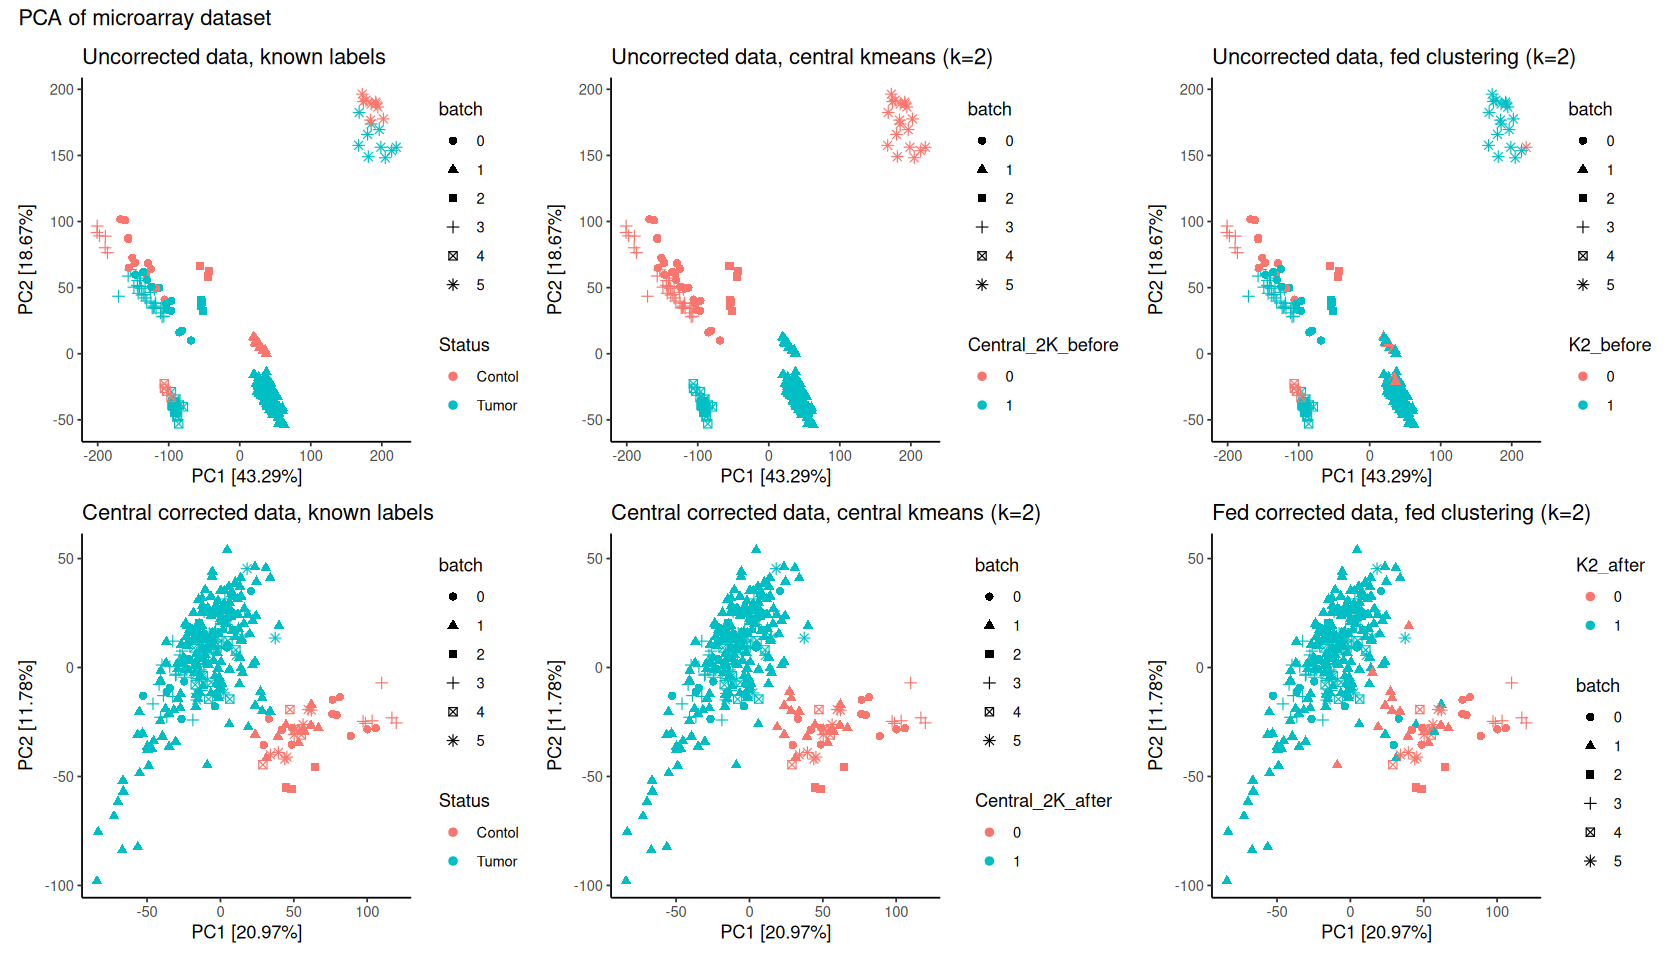

In [25]:
options(repr.plot.width=14, repr.plot.height=8)

combined_patchwork <- (
  plots_list[[1]] +
  plots_list[[2]] +
  plots_list[[3]] +
  plots_list[[4]] +
  plots_list[[5]] +
  plots_list[[6]] 
) + plot_layout(ncol = 3) + plot_annotation(title = "PCA of microarray dataset")
# Display the combined plot
print(combined_patchwork)

# Scores

In [29]:
design_all <- read_delim(
    "after/design_all_updated.tsv",
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
)

In [31]:
f1_score_single <- function(df, pred_col, true_col, positive = 1) {
  # Create confusion matrix
  cm <- table(Predicted = df[[pred_col]], Actual = df[[true_col]])
  
  # Ensure the positive class exists in the confusion matrix
  if(!(positive %in% rownames(cm)) || !(positive %in% colnames(cm))) {
    stop("The specified positive class is not present in the predictions or actual labels.")
  }
  
  # Calculate True Positives, False Positives, and False Negatives
  TP <- cm[as.character(positive), as.character(positive)]
  FP <- sum(cm[as.character(positive), ]) - TP
  FN <- sum(cm[, as.character(positive)]) - TP
  TN <- sum(cm) - (TP + FP + FN)
  
  # Compute precision, recall and F1 score
  precision <- if ((TP + FP) == 0) NA else TP / (TP + FP)
  recall <- if ((TP + FN) == 0) NA else TP / (TP + FN)
  f1 <- if (is.na(precision) || is.na(recall) || (precision + recall) == 0) NA else 2 * precision * recall / (precision + recall)
  
  # Specificity calculation: TN/(TN+FP)
  specificity <- if ((TN + FP) == 0) NA else TN / (TN + FP)
  
  # Balanced Accuracy: (Sensitivity + Specificity)/2
  balanced_accuracy <- if (is.na(recall) || is.na(specificity)) NA else (recall + specificity) / 2
  
  # Matthews Correlation Coefficient (MCC)
  denominator <- sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
  mcc <- if (denominator == 0) NA else (TP * TN - FP * FN) / denominator
  
  # Return a named vector with all the computed metrics
  return(c(f1_score = f1,
           precision = precision,
           recall = recall,
           specificity = specificity,
           balanced_accuracy = balanced_accuracy,
           mcc = mcc))
}



print("Central correction and clustering (k=2)")
# Example usage for K2_before
f1_before <- f1_score_single(design_all, "Central_2K_before", "Status", positive = 0)
print(f1_before)
print("")

# Example usage for K2_after
f1_after <- f1_score_single(design_all, "Central_2K_after", "Status", positive = 0)
print(f1_after)



print("Federated correction and clustering (k=2)")
# Example usage for K2_before
f1_before <- f1_score_single(design_all, "K2_before", "Status", positive = 0)
print(f1_before)
print("")

# Example usage for K2_after
f1_after <- f1_score_single(design_all, "K2_after", "Status", positive = 0)
print(f1_after)


[1] "Central correction and clustering (k=2)"


         f1_score         precision            recall       specificity 
        0.4580153         0.3448276         0.6818182         0.7849057 
balanced_accuracy               mcc 
        0.7333619         0.3626379 
[1] ""
         f1_score         precision            recall       specificity 
        0.9361702         0.8800000         1.0000000         0.9773585 
balanced_accuracy               mcc 
        0.9886792         0.9274025 
[1] "Federated correction and clustering (k=2)"
         f1_score         precision            recall       specificity 
        0.7000000         0.7777778         0.6363636         0.9698113 
balanced_accuracy               mcc 
        0.8030875         0.6602596 
[1] ""
         f1_score         precision            recall       specificity 
        0.8222222         0.8043478         0.8409091         0.9660377 
balanced_accuracy               mcc 
        0.9034734         0.7922047 
